In [38]:
library(Seurat)
library(Signac)
suppressMessages(library(EnsDb.Mmusculus.v79))


Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.1.3”


In [2]:
## take the individual objects after doubletfinder

## in each individual object filter for the barcodes that are 
# in the cleaned object (no doublets, no low qc clusters, filtered nCount_ATAC > 500)

# plotting coverage plots for each individual object

# notebook to test if coverageplot works
# output: each object with the annotation (seems like the histone mods might have already had their annotations)

In [3]:
sobj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_lung_pt_integ_atac_nodoub_filt_atac.RDS")

In [4]:
sobj[['RNA']]
sobj[['H3K27ac']]
sobj[['H3K27me3']] #only one thats a chromatin assay still
sobj[['ATAC']]


Assay data with 32285 features for 19260 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

Assay data with 71449 features for 19260 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

ChromatinAssay data with 23296 features for 19260 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

Assay data with 75257 features for 19260 cells
First 10 features:
 chr1-3670536-3671156, chr1-3671301-3672191, chr1-3913332-3914171,
chr1-3915425-3916295, chr1-4255582-4256448, chr1-4259855-4260687,
chr1-4412190-4413102, chr1-4426673-4427603, chr1-4456410-4457357,
chr1-4470987-4472294 

In [5]:
sobj$cell_barcode <- colnames(sobj)

In [6]:
cln_barcodes <- colnames(sobj)

In [7]:
celltype_df <- data.frame(celltype=sobj$celltype_v04)
head(celltype_df)

,celltype
,<chr>
AAACAGCCAATAACGA-1_1,Pericytes
AAACAGCCAGTTTACG-1_1,Capillary
AAACAGCCATAAAGCA-1_1,Pericytes
AAACAGCCATCATGTG-1_1,Fibroblasts
AAACATGCAATCCCTT-1_1,Capillary
AAACATGCAGTTAAAG-1_1,Capillary


In [8]:
celltype_df$orig_bc <- gsub('_.*', '',rownames(celltype_df) )

In [9]:
head(celltype_df)

,celltype,orig_bc
,<chr>,<chr>
AAACAGCCAATAACGA-1_1,Pericytes,AAACAGCCAATAACGA-1
AAACAGCCAGTTTACG-1_1,Capillary,AAACAGCCAGTTTACG-1
AAACAGCCATAAAGCA-1_1,Pericytes,AAACAGCCATAAAGCA-1
AAACAGCCATCATGTG-1_1,Fibroblasts,AAACAGCCATCATGTG-1
AAACATGCAATCCCTT-1_1,Capillary,AAACATGCAATCCCTT-1
AAACATGCAGTTAAAG-1_1,Capillary,AAACATGCAGTTAAAG-1


In [10]:
celltype_df$orig_bc <- gsub('_.*', '',rownames(celltype_df) )

In [12]:
head(celltype_df)

,celltype,orig_bc
,<chr>,<chr>
AAACAGCCAATAACGA-1_1,Pericytes,AAACAGCCAATAACGA-1
AAACAGCCAGTTTACG-1_1,Capillary,AAACAGCCAGTTTACG-1
AAACAGCCATAAAGCA-1_1,Pericytes,AAACAGCCATAAAGCA-1
AAACAGCCATCATGTG-1_1,Fibroblasts,AAACAGCCATCATGTG-1
AAACATGCAATCCCTT-1_1,Capillary,AAACATGCAATCCCTT-1
AAACATGCAGTTAAAG-1_1,Capillary,AAACATGCAGTTAAAG-1


In [15]:
celltype_df$orig.ident <- sobj$orig.ident

In [16]:
table(celltype_df$orig.ident)
#seems like i didn't add library_rna_atac_id manually to the atac multiome but at least
# it has orig.ident


    JL_10_1_2_JL_09_1_2 QY_2221_1_2_QY_2220_1_2 QY_2223_1_2_QY_2222_1_2 
                   5392                    7781                    6087 

In [17]:
df_filt_atac <- subset(celltype_df, orig.ident == "JL_10_1_2_JL_09_1_2")

In [18]:
nrow(df_filt_atac)

[1] 5392

In [22]:
sobj_atac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/JL_10_1_2_JL_09_1_2_DF.0.05.RDS")

In [23]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [32]:
sobj_atac
colnames(sobj_atac@meta.data)
sobj_atac[['RNA']]
sobj_atac[['ATAC']]

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_ATAC"                     
 [5] "nFeature_ATAC"                    "fragments_freq_count"            
 [7] "FRiP"                             "percent.mt"                      
 [9] "nCount_SCT"                       "nFeature_SCT"                    
[11] "pANN_0.25_0.04_707"               "DF.classifications_0.25_0.04_707"
[13] "cell_barcode"

Assay data with 32285 features for 9603 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 75257 features for 9603 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 1 

In [26]:
sobj_atac$cell_barcode <- colnames(sobj_atac)

In [27]:
sobj_atac_cln <- subset(sobj_atac, cell_barcode %in% df_filt_atac$orig_bc)

In [28]:
sobj_atac_cln 

An object of class Seurat 
126070 features across 5392 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [29]:
sobj_atac_cln$celltype_v04 <- df_filt_atac$celltype

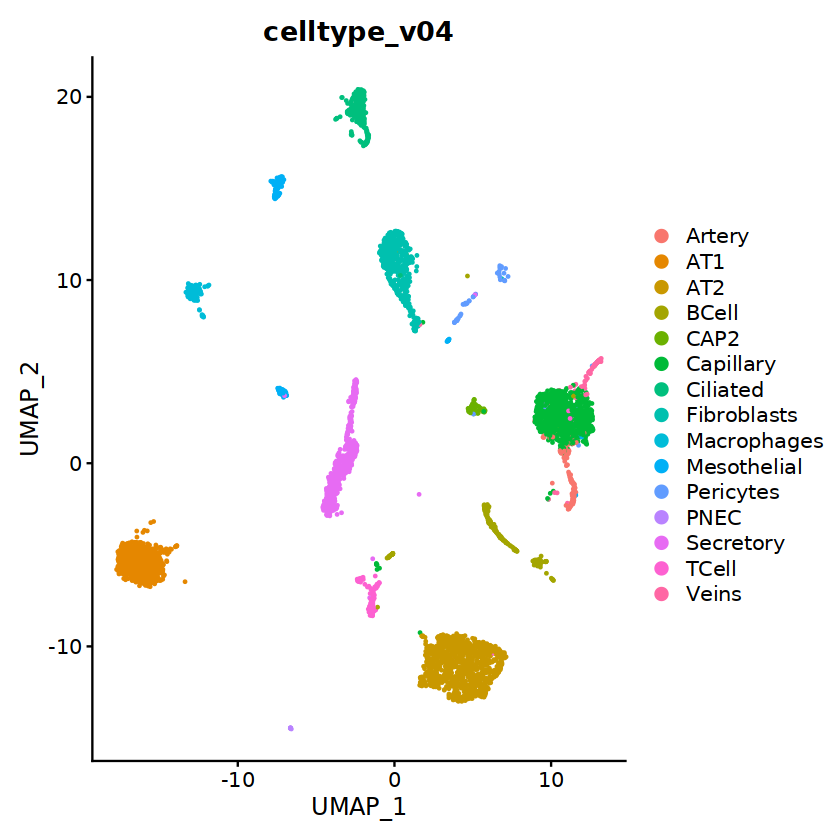

In [30]:
DimPlot(sobj_atac_cln, group.by = "celltype_v04")

In [ ]:
# saving filtered atac object, with annotation 
# with atac cells taken directly from cleaned object, (nCount_ATAC > 500, doublets removed, small potential doublet clusters remove)

In [43]:
library(EnsDb.Mmusculus.v79)

In [44]:
# extract gene annotations from EnsDb #putting verbose = F gets it stuck in a loop
Sys.time()
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(sobj_atac_cln) <- annotations
Sys.time()


[1] "2024-01-05 15:46:15 PST"

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

[1] "2024-01-05 15:46:40 PST"

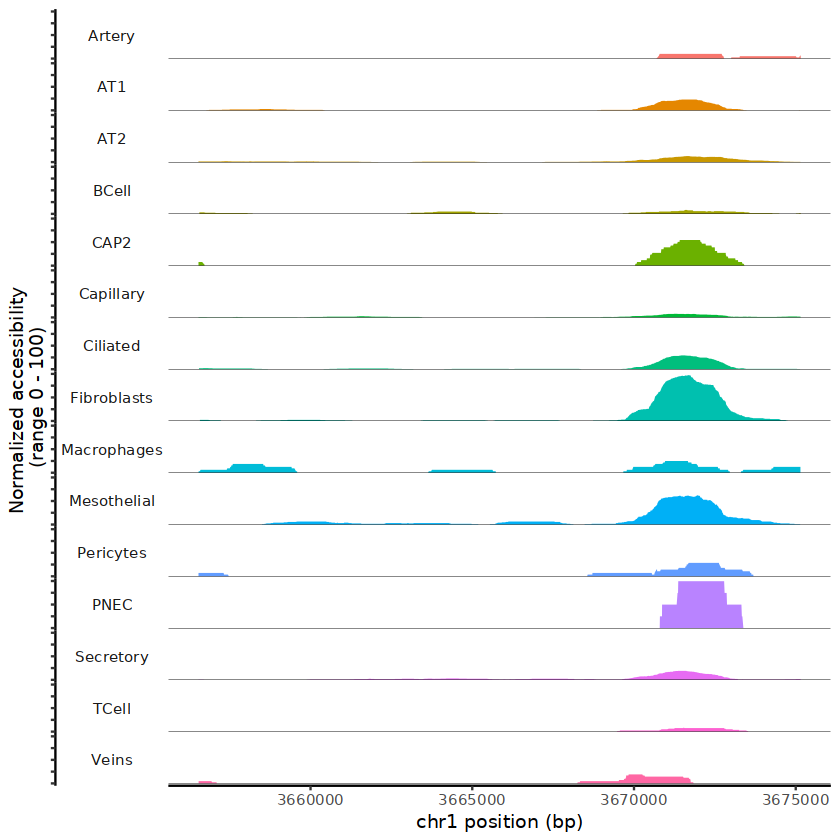

In [42]:
DefaultAssay(sobj_atac_cln) <- 'ATAC'
CoveragePlot(sobj_atac_cln, region = "chr1-3670536-3671156", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 2 rows containing missing values (geom_segment)."


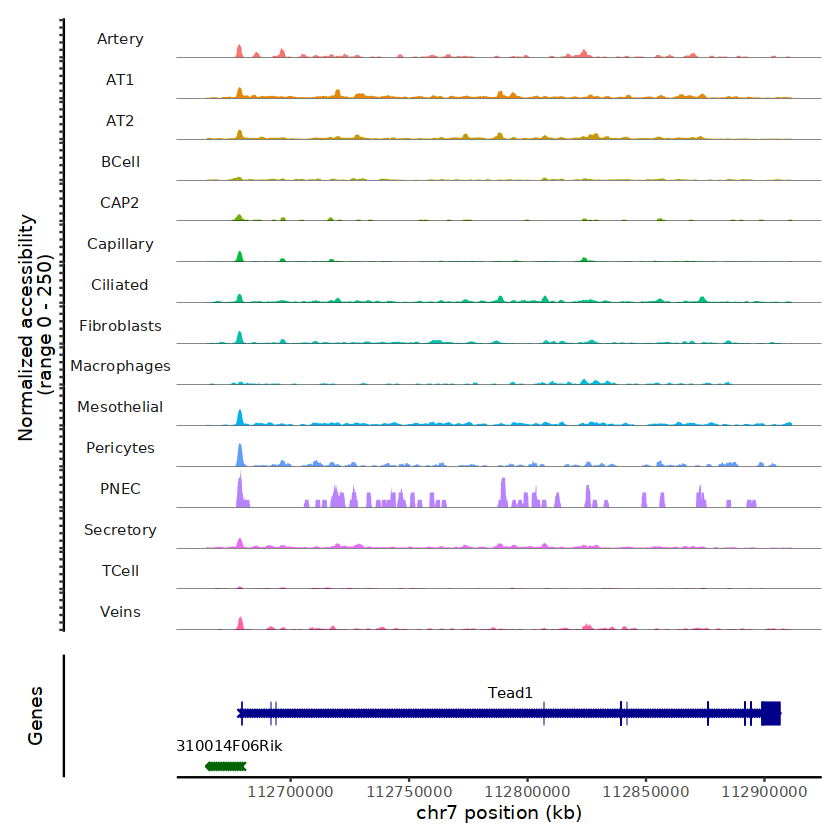

In [45]:
DefaultAssay(sobj_atac_cln) <- 'ATAC'
CoveragePlot(sobj_atac_cln, region = "Tead1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 58 rows containing missing values (position_stack)."
Warning message:
"Removed 12 rows containing missing values (geom_segment)."


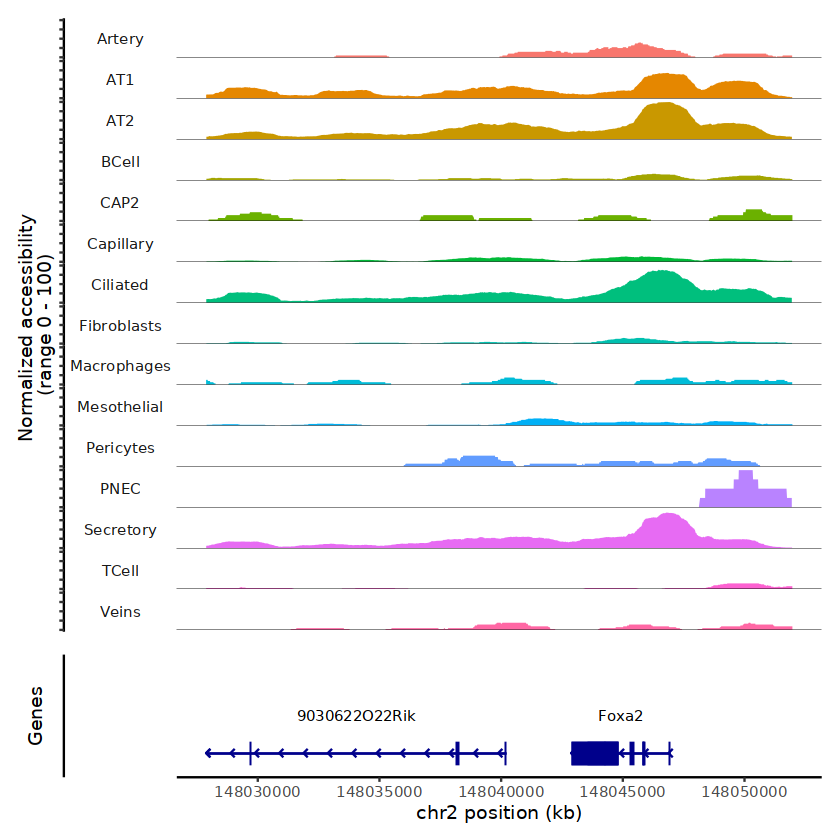

In [46]:
DefaultAssay(sobj_atac_cln) <- 'ATAC'
CoveragePlot(sobj_atac_cln, region = "Foxa2", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

In [47]:
saveRDS(sobj_atac_cln, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_02_indiv_atac.RDS")


In [35]:
sobj_h3k27me3 <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/QY_2221_1_2_QY_2220_DF.0.05.RDS")

In [36]:
sobj_h3k27me3
colnames(sobj_h3k27me3@meta.data)
sobj_h3k27me3[['RNA']]
sobj_h3k27me3[['H3K27me3']]

An object of class Seurat 
59045 features across 12480 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                         "nCount_H3K27me3"                   
 [3] "nFeature_H3K27me3"                  "nCount_RNA"                        
 [5] "nFeature_RNA"                       "percent.mt"                        
 [7] "fragments_freq_count"               "FRiP"                              
 [9] "TSS.enrichment"                     "TSS.percentile"                    
[11] "library_rna_atac_id"                "nCount_SCT"                        
[13] "nFeature_SCT"                       "pANN_0.25_0.005_1184"              
[15] "DF.classifications_0.25_0.005_1184"

Assay data with 32285 features for 12480 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 4825 features for 12480 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

An object of class Seurat 
59045 features across 7781 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

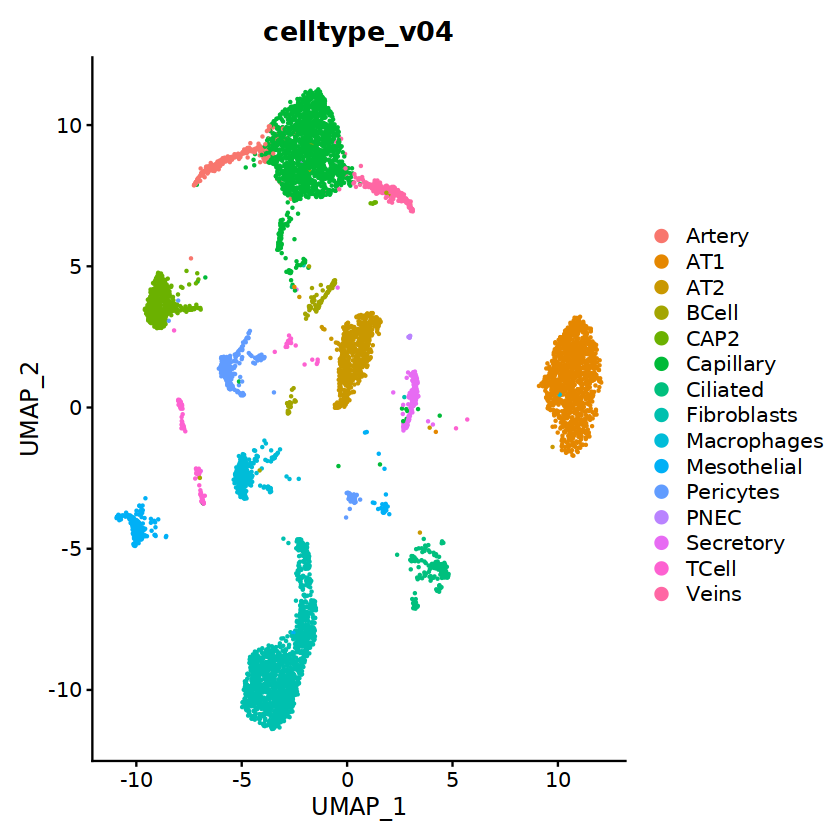

In [48]:
df_filt_h3k27me3 <- subset(celltype_df, orig.ident == "QY_2221_1_2_QY_2220_1_2")
sobj_h3k27me3$cell_barcode <- colnames(sobj_h3k27me3)
sobj_h3k27me3_cln <- subset(sobj_h3k27me3, cell_barcode %in% df_filt_h3k27me3$orig_bc)
sobj_h3k27me3_cln 
sobj_h3k27me3_cln$celltype_v04 <- df_filt_h3k27me3$celltype
DimPlot(sobj_h3k27me3_cln, group.by = "celltype_v04")

In [49]:
# extract gene annotations from EnsDb #putting verbose = F gets it stuck in a loop
Sys.time()
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(sobj_h3k27me3_cln ) <- annotations
Sys.time()

#Warning message in .merge_two_Seqinfo_objects(x, y):
#"The 2 combined objects have no sequence levels in common. (Use
#  suppressWarnings() to suppress this warning.)"

[1] "2024-01-05 16:04:04 PST"

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [51]:
Annotation(sobj_h3k27me3_cln)

An object of class Seurat 
59045 features across 7781 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
"Removed 20 rows containing missing values (position_stack)."
Warning message:
"Removed 2 rows containing missing values (geom_segment)."


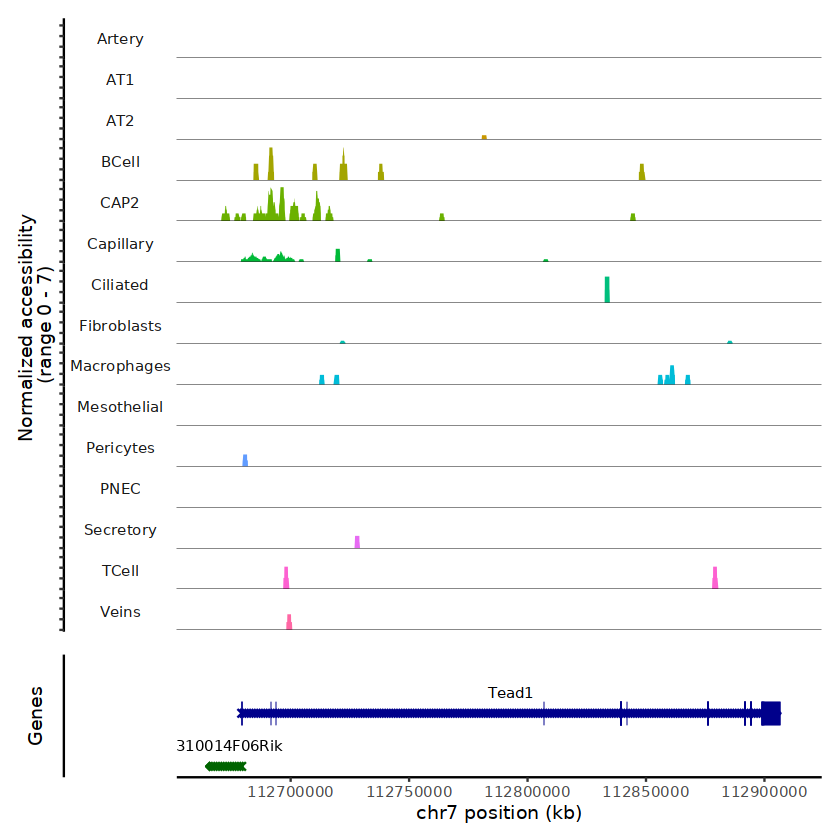

In [52]:
DefaultAssay(sobj_h3k27me3_cln ) <- 'H3K27me3'
CoveragePlot(sobj_h3k27me3_cln , region = "Tead1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 12 rows containing missing values (geom_segment)."


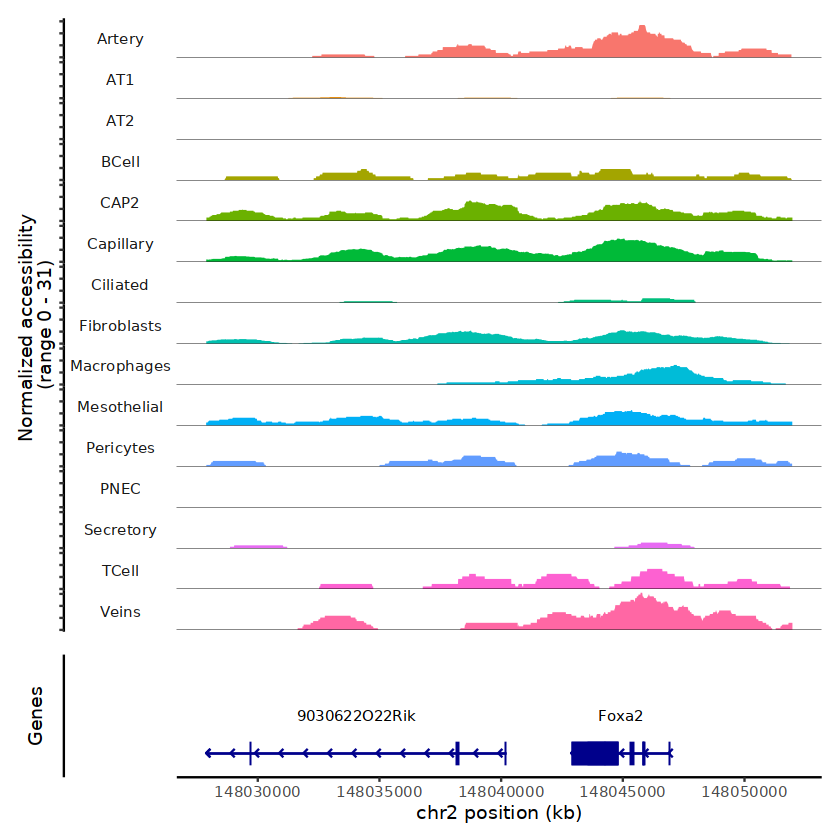

In [55]:
DefaultAssay(sobj_h3k27me3_cln ) <- 'H3K27me3'
CoveragePlot(sobj_h3k27me3_cln , region = "Foxa2", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

In [70]:
saveRDS(sobj_h3k27me3_cln, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_03_indiv_h3k27me3.RDS")


In [61]:
sobj_h3k27ac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/QY_2223_1_2_QY_2222_DF.0.05.RDS")

In [62]:
sobj_h3k27ac

An object of class Seurat 
113186 features across 11907 samples within 3 assays 
Active assay: SCT (21916 features, 3000 variable features)
 2 other assays present: H3K27ac, RNA
 2 dimensional reductions calculated: pca, umap

In [63]:
sobj_h3k27ac
colnames(sobj_h3k27ac@meta.data)
sobj_h3k27ac[['RNA']]
sobj_h3k27ac[['H3K27ac']]

An object of class Seurat 
113186 features across 11907 samples within 3 assays 
Active assay: SCT (21916 features, 3000 variable features)
 2 other assays present: H3K27ac, RNA
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                       "nCount_H3K27ac"                  
 [3] "nFeature_H3K27ac"                 "nCount_RNA"                      
 [5] "nFeature_RNA"                     "percent.mt"                      
 [7] "fragments_freq_count"             "FRiP"                            
 [9] "TSS.enrichment"                   "TSS.percentile"                  
[11] "library_rna_atac_id"              "nCount_SCT"                      
[13] "nFeature_SCT"                     "pANN_0.25_0.3_1078"              
[15] "DF.classifications_0.25_0.3_1078"

Assay data with 32285 features for 11907 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 58985 features for 11907 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [65]:
DefaultAssay(sobj_h3k27ac) <- 'H3K27ac' #seems like annotation is already there

In [66]:
Annotation(sobj_h3k27ac)

GRanges object with 1763965 ranges and 5 metadata columns:
                     seqnames          ranges strand |              tx_id
                        <Rle>       <IRanges>  <Rle> |        <character>
  ENSMUSE00001236884     chr3 3508030-3508332      + | ENSMUST00000108393
  ENSMUSE00000676606     chr3 3634150-3634347      + | ENSMUST00000108394
  ENSMUSE00001345708     chr3 3638059-3638230      + | ENSMUST00000108393
  ENSMUSE00001345708     chr3 3638059-3638230      + | ENSMUST00000108394
  ENSMUSE00000149313     chr3 3641223-3641317      + | ENSMUST00000108393
                 ...      ...             ...    ... .                ...
  ENSMUST00000082414    chrMT     10167-11544      + | ENSMUST00000082414
  ENSMUST00000082418    chrMT     11742-13565      + | ENSMUST00000082418
  ENSMUST00000082419    chrMT     13552-14070      - | ENSMUST00000082419
  ENSMUST00000082421    chrMT     14145-15288      + | ENSMUST00000082421
  ENSMUST00000084013    chrMT      9877-10173      + 

An object of class Seurat 
113186 features across 6087 samples within 3 assays 
Active assay: H3K27ac (58985 features, 0 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

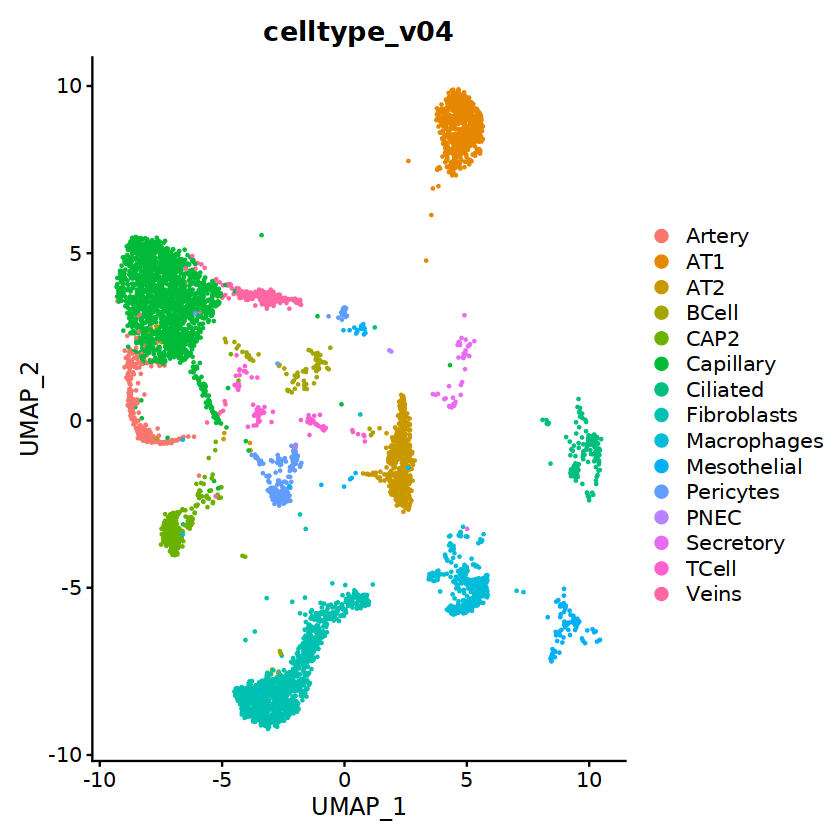

In [67]:
df_filt_h3k27ac <- subset(celltype_df, orig.ident == "QY_2223_1_2_QY_2222_1_2")
sobj_h3k27ac$cell_barcode <- colnames(sobj_h3k27ac)
sobj_h3k27ac_cln <- subset(sobj_h3k27ac, cell_barcode %in% df_filt_h3k27ac$orig_bc)
sobj_h3k27ac_cln 
sobj_h3k27ac_cln$celltype_v04 <- df_filt_h3k27ac$celltype
DimPlot(sobj_h3k27ac_cln, group.by = "celltype_v04")

Warning message:
"Removed 27 rows containing missing values (position_stack)."
Warning message:
"Removed 2 rows containing missing values (geom_segment)."


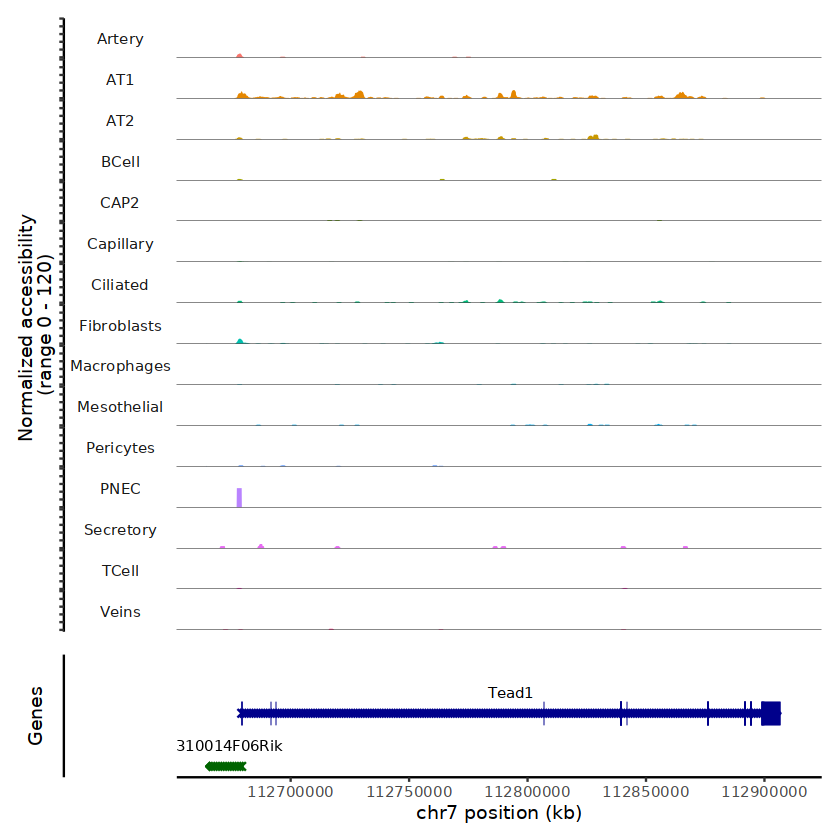

In [68]:
DefaultAssay(sobj_h3k27ac_cln ) <- 'H3K27ac'
CoveragePlot(sobj_h3k27ac_cln , region = "Tead1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 200 rows containing missing values (position_stack)."
Warning message:
"Removed 12 rows containing missing values (geom_segment)."


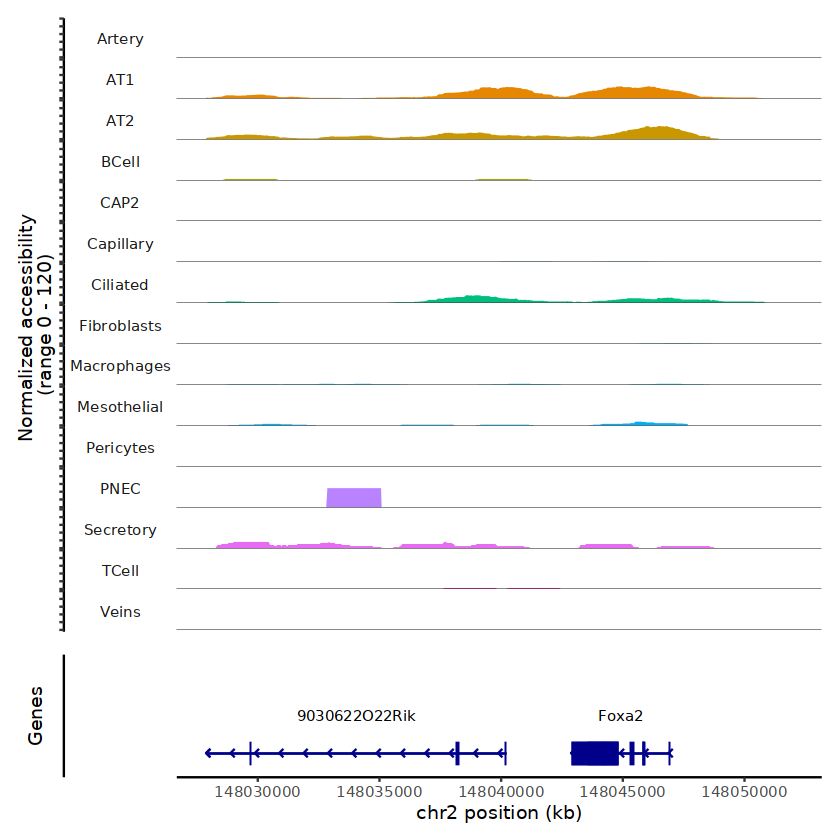

In [69]:
DefaultAssay(sobj_h3k27ac_cln ) <- 'H3K27ac'
CoveragePlot(sobj_h3k27ac_cln , region = "Foxa2", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

In [71]:
saveRDS(sobj_h3k27ac_cln, "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_04_indiv_h3k27ac.RDS")
